# Speaker Vector HuggingFace

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/speaker-vector-huggingface](https://github.com/huseinzol05/malaya-speech/tree/master/example/speaker-vector-huggingface).
    
</div>

<div class="alert alert-info">

This module is language independent, so it save to use on different languages. Pretrained models trained on multilanguages.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [4]:
from malaya_speech import Pipeline
import malaya_speech
import numpy as np

`pyaudio` is not available, `malaya_speech.streaming.stream` is not able to use.


### List available HuggingFace model

In [6]:
malaya_speech.speaker_vector.available_huggingface()

,Size (MB),Embedding Size,EER
microsoft/wavlm-base-sv,405.0,512.0,0.076128
microsoft/wavlm-base-plus-sv,405.0,512.0,0.063156
microsoft/unispeech-sat-large-sv,1290.0,512.0,0.203277
microsoft/unispeech-sat-base-sv,404.0,512.0,0.078282
microsoft/unispeech-sat-base-plus-sv,404.0,512.0,0.076128


**Smaller EER the better model is**.

### Load HuggingFace model

```python
def huggingface(
    model: str = 'microsoft/wavlm-base-plus-sv',
    force_check: bool = True,
    **kwargs,
):
    """
    Load Finetuned models from HuggingFace.

    Parameters
    ----------
    model : str, optional (default='microsoft/wavlm-base-plus-sv')
        Check available models at `malaya_speech.speaker_vector.available_huggingface()`.
    force_check: bool, optional (default=True)
        Force check model one of malaya model.
        Set to False if you have your own huggingface model.

    Returns
    -------
    result : malaya_speech.torch_model.huggingface.XVector class
    """
```

In [5]:
model = malaya_speech.speaker_vector.huggingface()

In [6]:
from glob import glob

speakers = [
    'speech/example-speaker/khalil-nooh.wav',
    'speech/example-speaker/mas-aisyah.wav',
    'speech/example-speaker/shafiqah-idayu.wav',
    'speech/example-speaker/husein-zolkepli.wav'
]

### Pipeline

In [7]:
def load_wav(file):
    return malaya_speech.load(file)[0]

p = Pipeline()
frame = p.foreach_map(load_wav).map(model)

/home/husein/.local/lib/python3.8/site-packages/networkx/readwrite/graphml.py:346: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (np.int, "int"), (np.int8, "int"),
/home/husein/.local/lib/python3.8/site-packages/networkx/readwrite/gexf.py:220: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current

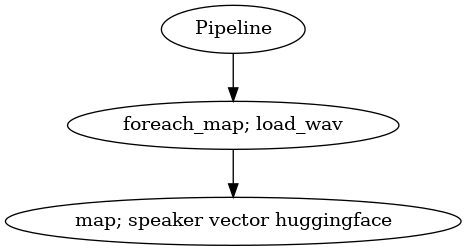

In [8]:
p.visualize()

In [9]:
r = p(speakers)

/home/husein/.local/lib/python3.8/site-packages/transformers/models/wavlm/modeling_wavlm.py:1755: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  return (input_length - kernel_size) // stride + 1


### Calculate similarity

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
cosine_similarity(r['speaker-vector-huggingface'])

array([[1.0000001 , 0.4988824 , 0.36581534, 0.92033345],
       [0.4988824 , 1.0000001 , 0.6961168 , 0.48723692],
       [0.36581534, 0.6961168 , 1.0000002 , 0.38700205],
       [0.92033345, 0.48723692, 0.38700205, 1.0000001 ]], dtype=float32)

Remember, our files are,

```python
['speech/example-speaker/khalil-nooh.wav',
 'speech/example-speaker/mas-aisyah.wav',
 'speech/example-speaker/shafiqah-idayu.wav',
 'speech/example-speaker/husein-zolkepli.wav']
```